In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

repair_data = pd.read_csv('../repairs.csv')
cache_data = pd.read_csv('../cache.csv')

In [104]:
repair_data.info()
repair_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6174 non-null   int64  
 1   ontology            6174 non-null   object 
 2   failed              6174 non-null   bool   
 3   failed_repair       4877 non-null   object 
 4   steps               4400 non-null   float64
 5   time                4400 non-null   float64
 6   calls               4400 non-null   float64
 7   iic_mcs             4358 non-null   float64
 8   iic_remove          4348 non-null   float64
 9   inf_mcs             4358 non-null   float64
 10  inf_weakening       4358 non-null   float64
 11  inf_remove          4348 non-null   float64
 12  failed_enhance      4400 non-null   object 
 13  steps_enhance       4340 non-null   float64
 14  time_enhance        4340 non-null   float64
 15  calls_enhance       4340 non-null   float64
 16  inf_en

,Unnamed: 0,steps,time,calls,iic_mcs,iic_remove,inf_mcs,inf_weakening,inf_remove,steps_enhance,time_enhance,calls_enhance,inf_enhance,iic_enhance_weaken,iic_enhance_mcs,iic_enhance_remove,iic_mcs_remove
count,6174.000000,4400.000000,4400.000000,4400.000000,4358.000000,4348.000000,4358.000000,4358.000000,4348.000000,4340.000000,4340.000000,4340.000000,4301.000000,4301.000000,4301.000000,4291.000000,4348.000000
mean,3086.500000,2.437500,6760.947500,6746.289091,0.515399,0.595590,2718.612207,2743.865764,2669.261270,14.066129,5097.848618,5697.263825,2877.455708,0.599634,0.614190,0.690109,0.534715
std,1782.424613,5.897372,22399.376864,8113.250815,0.365929,0.332961,3164.818618,3265.417304,3193.365252,51.826790,18607.169561,6748.229582,3390.623695,0.340654,0.366319,0.335372,0.331809
min,0.000000,1.000000,605.000000,535.000000,0.000000,0.000000,120.000000,117.000000,117.000000,1.000000,516.000000,63.000000,119.000000,0.000000,0.000000,0.000000,0.000000
25%,1543.250000,1.000000,1430.000000,2142.500000,0.134342,0.500000,444.250000,406.250000,393.000000,1.000000,953.000000,1426.750000,437.000000,0.375000,0.341463,0.500000,0.301370
50%,3086.500000,1.000000,2143.500000,3934.500000,0.500000,0.500000,875.000000,875.000000,875.000000,2.000000,1422.500000,3029.000000,903.000000,0.573427,0.685573,0.806262,0.500000
75%,4629.750000,2.000000,3805.500000,8165.500000,0.900000,0.997990,5288.750000,5427.000000,5159.250000,7.000000,2313.750000,7056.000000,5704.000000,0.969925,0.993750,1.000000,0.878935
max,6173.000000,143.000000,289736.000000,112949.000000,1.000000,1.000000,18006.000000,17766.000000,17766.000000,1028.000000,296601.000000,81163.000000,18051.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
repair_data['Ontology'] = repair_data['ontology']
repair_data['Has failed'] = repair_data['failed'].map(
    {True: 'Yes', False: 'No'})
repair_data['Has failed weakening'] = repair_data['failed_repair'].map(
    {True: 'Yes', False: 'No'})
repair_data['Weakening steps'] = repair_data['steps']
repair_data['Repair time [ms]'] = repair_data['time']
repair_data['Reasoner calls'] = repair_data['calls']
repair_data['IIC w.r.t. maximal consistent subset'] = repair_data['iic_mcs']
repair_data['IIC w.r.t. repair by removal'] = repair_data['iic_remove']
repair_data['Inferred (weakening)'] = repair_data['inf_weakening']
repair_data['Inferred (MCS)'] = repair_data['inf_mcs']
repair_data['Inferred (removal)'] = repair_data['inf_remove']
repair_data['Weakening steps v2'] = repair_data['steps_enhance']
repair_data['Repair time [ms] v2'] = repair_data['time_enhance']
repair_data['Reasoner calls v2'] = repair_data['calls_enhance']
repair_data['Inferred (weakening v2)'] = repair_data['inf_enhance']
repair_data['v2 IIC w.r.t. maximal consistent subset'] = repair_data['iic_enhance_mcs']
repair_data['v2 IIC w.r.t. repair by removal'] = repair_data['iic_enhance_remove']
repair_data['v2 IIC w.r.t. weakening'] = repair_data['iic_enhance_weaken']
repair_data['MCS IIC w.r.t. removal'] = repair_data['iic_mcs_remove']

In [106]:
cache_data.info()
cache_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37791 entries, 0 to 37790
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37791 non-null  int64  
 1   ontology    37791 non-null  object 
 2   reasoner    37791 non-null  object 
 3   size        37791 non-null  int64  
 4   type        37791 non-null  object 
 5   time        37791 non-null  float64
 6   calls       37791 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ MB


,Unnamed: 0,size,time,calls
count,37791.000000,37791.000000,37791.000000,37791.000000
mean,18895.000000,16.332460,309.677654,7199.666524
std,10909.466348,23.338733,694.406608,11597.458895
min,0.000000,1.000000,0.000000,0.000000
25%,9447.500000,5.000000,29.050000,885.700000
50%,18895.000000,10.000000,81.400000,2324.800000
75%,28342.500000,20.000000,271.400000,7169.005000
max,37790.000000,100.000000,12190.000000,84194.000000


In [107]:
cache_data['Ontology'] = cache_data['ontology']
cache_data['Reasoner'] = cache_data['reasoner'].map(
    {'fact++': 'FaCT++', 'hermit': 'HermiT', 'jfact': 'JFact', 'openllet': 'Openllet'})
cache_data['Weakening steps'] = cache_data['size']
cache_data['Caching strategy'] = cache_data['type'].map(
    {'full': 'Caching using transitivity', 'basic': 'Simple caching', 'uncached': 'No caching'})
cache_data['Time per weakening [ms]'] = cache_data['time']
cache_data['Reasoner calls per weakening'] = cache_data['calls']

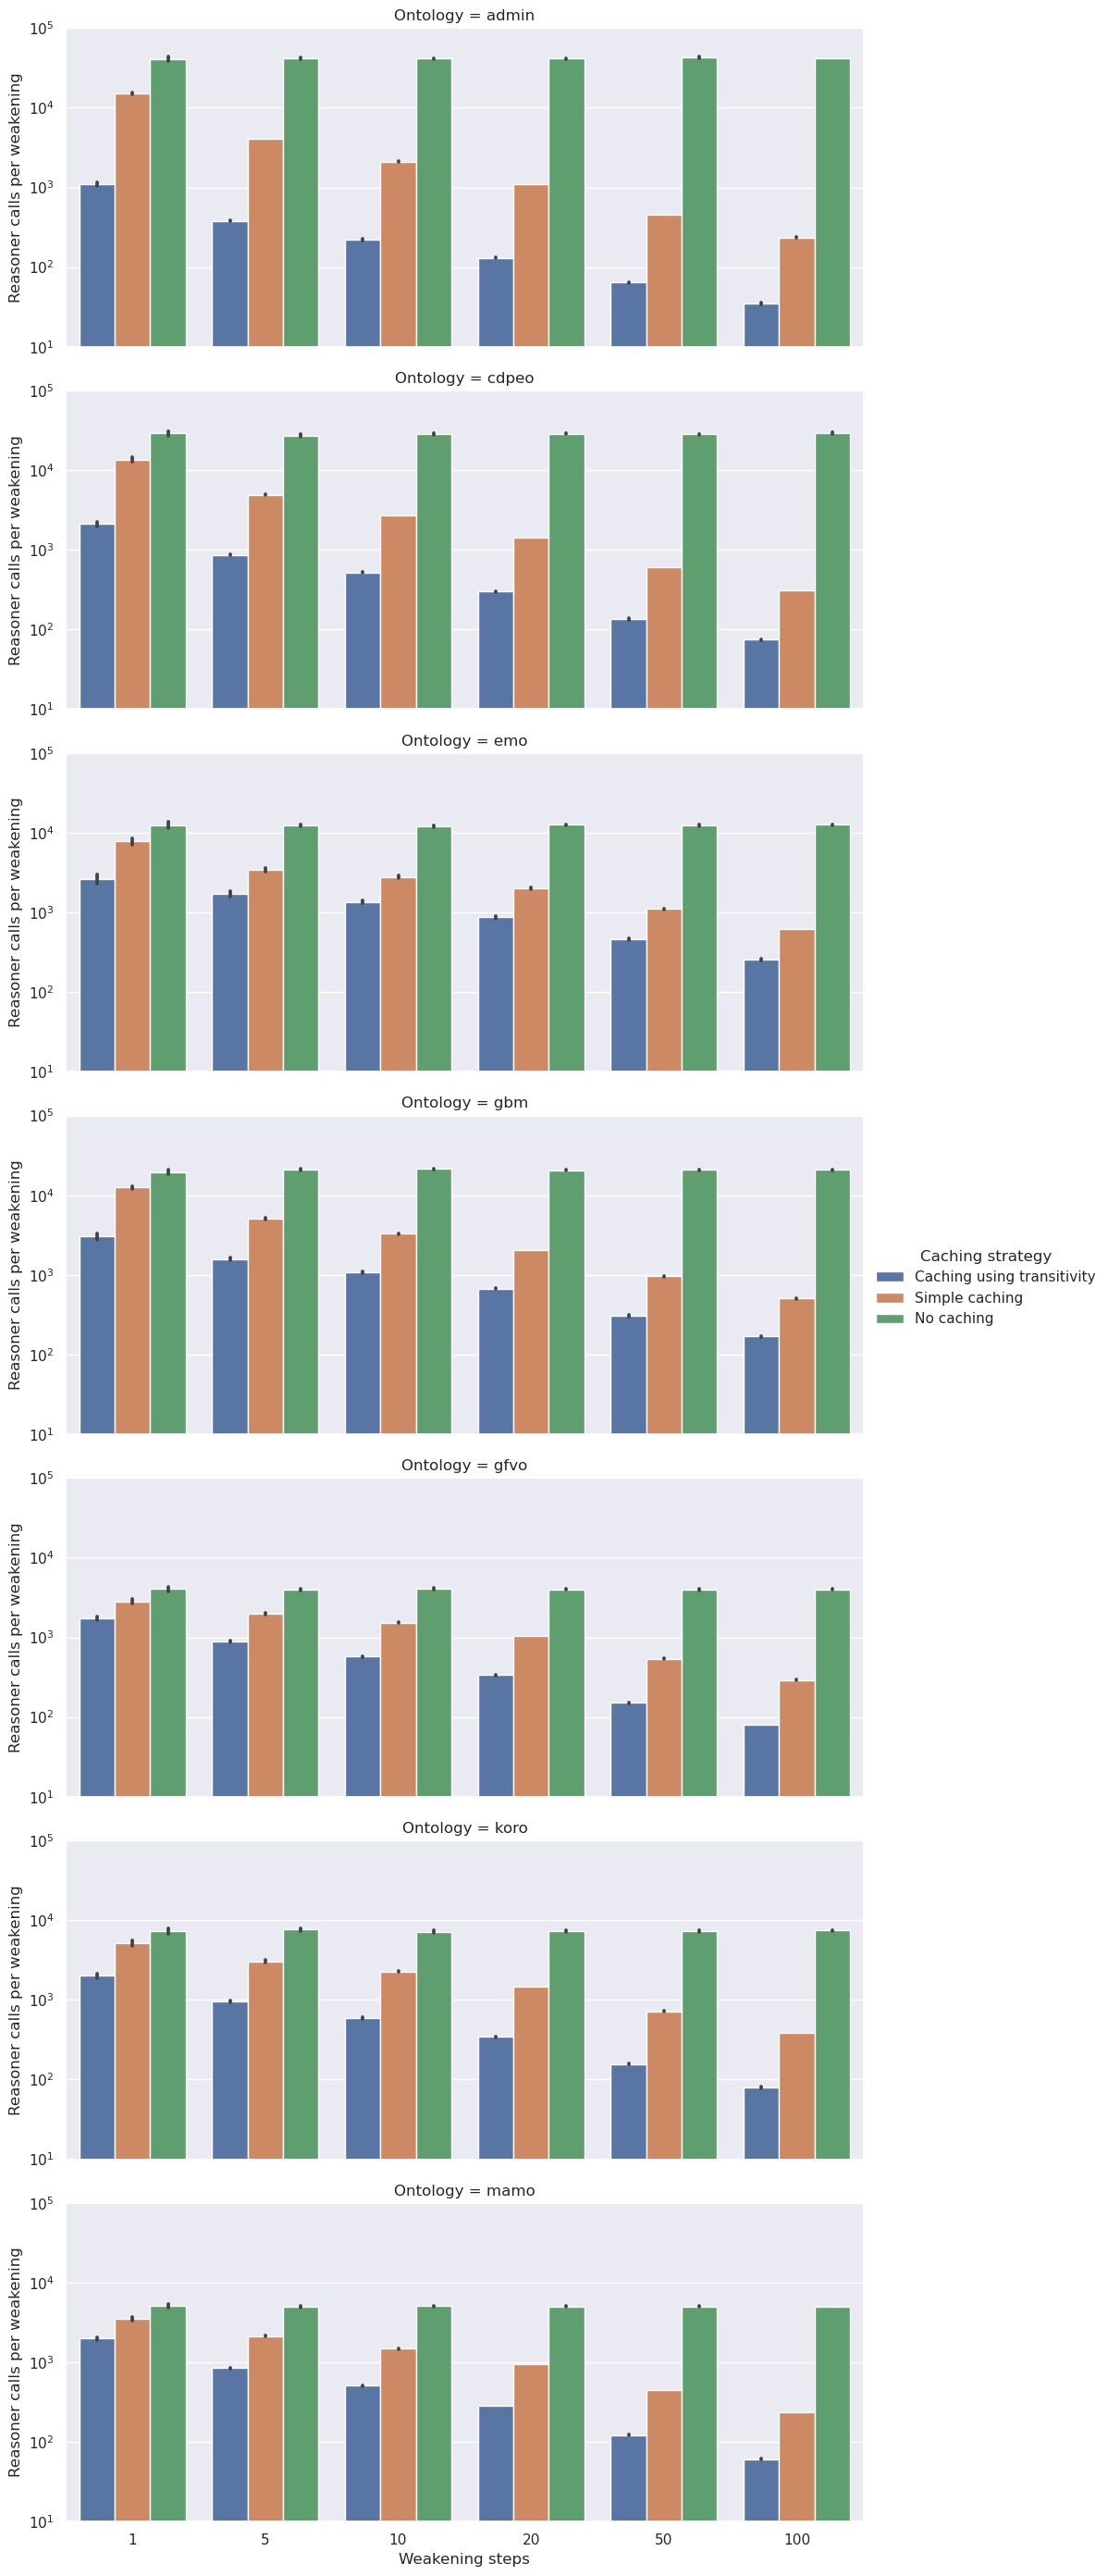

In [138]:
row_order = np.unique(cache_data['Ontology'])
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
g = sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening',
                hue='Caching strategy', row='Ontology', height=4, aspect=2.5, hue_order=order, row_order=row_order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-ontology-bar.png', dpi=100, bbox_inches = "tight")

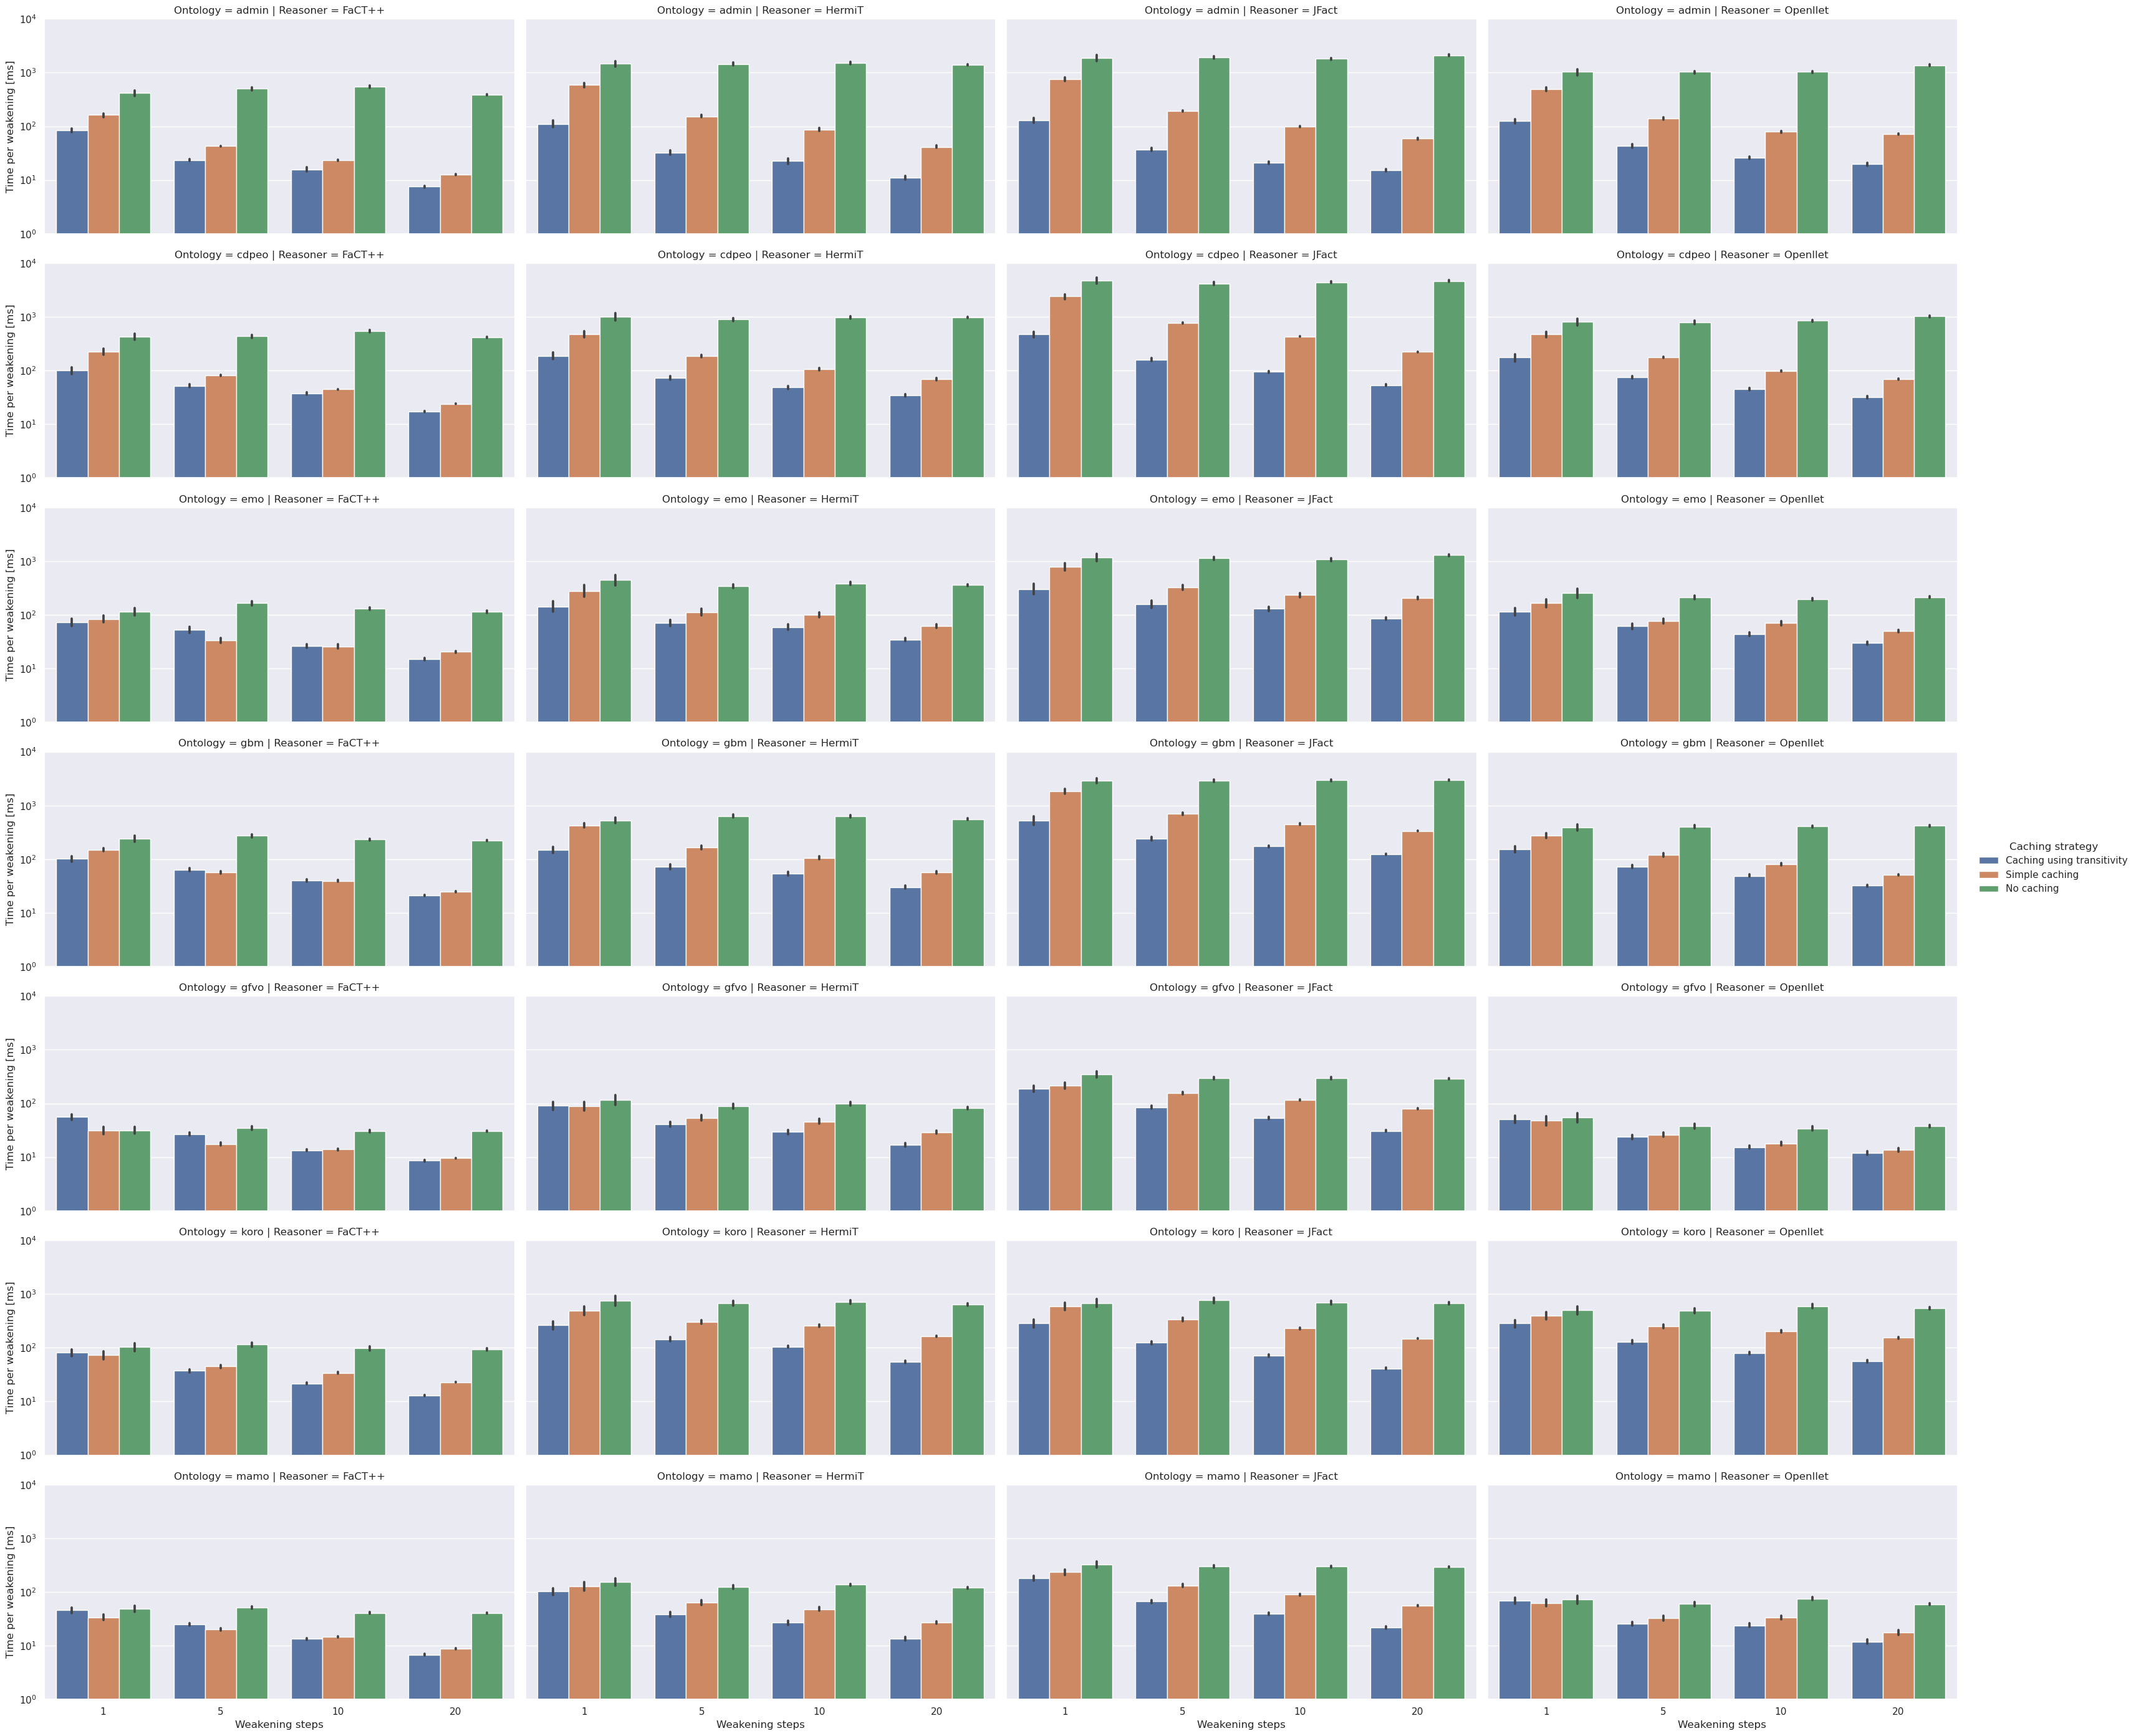

In [139]:
row_order = np.unique(cache_data['Ontology'])
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data[cache_data['size'] <= 20], kind='bar', x='Weakening steps', y='Time per weakening [ms]',
            hue='Caching strategy', row='Ontology', col='Reasoner', height=4, aspect=2, hue_order=order, row_order=row_order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-ontology-reasoner-bar.png', dpi=100, bbox_inches = "tight")

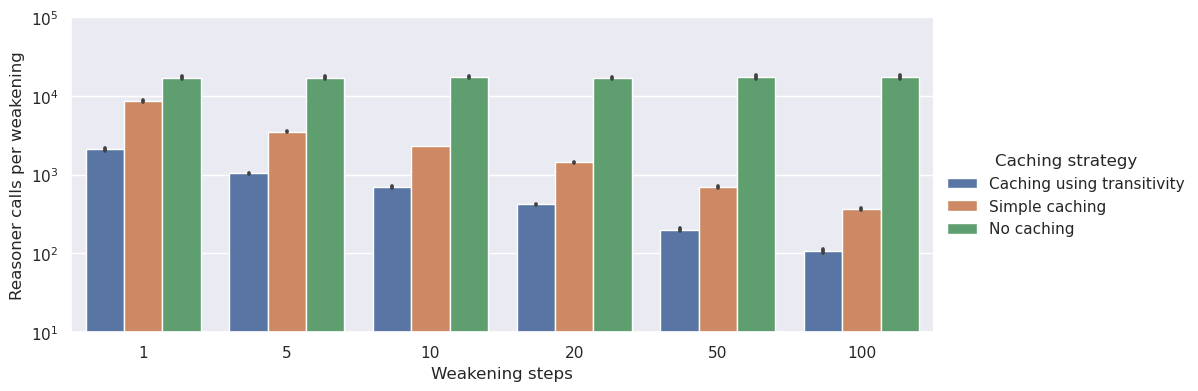

In [140]:
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening',
            hue='Caching strategy', height=4, aspect=2.5, hue_order=order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-bar.png', dpi=100, bbox_inches = "tight")

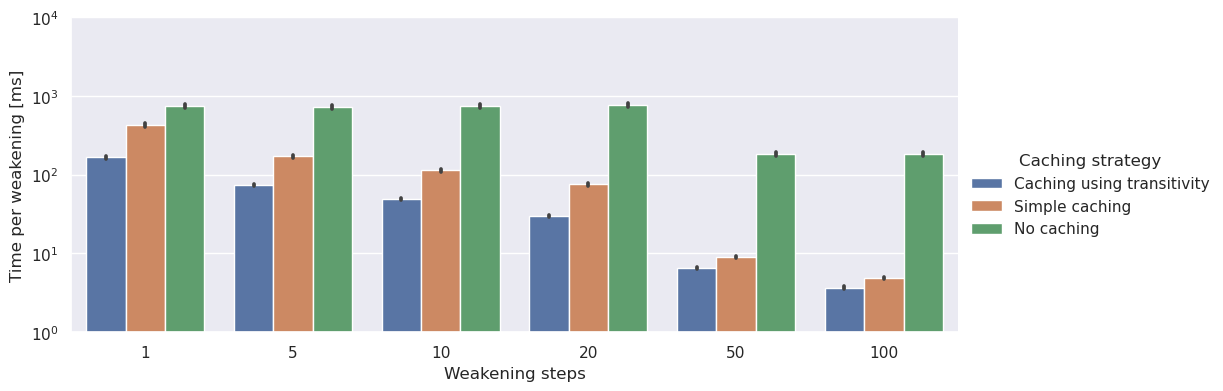

In [141]:
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps',
            y='Time per weakening [ms]', hue='Caching strategy', height=4, aspect=2.5, hue_order=order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-bar.png', dpi=100, bbox_inches = "tight")

In [142]:
type = ['Caching using transitivity', 'Simple caching', 'No caching']
onto = np.unique(cache_data['Ontology'])
size = np.unique(cache_data['Weakening steps'])
reas = np.unique(cache_data['Reasoner'])
print({o: {t: {s: round(cache_data[(cache_data['Ontology'] == o) & (cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s)]['Reasoner calls per weakening'].mean()) for s in size} for t in type} for o in onto})

print({r: {o: {t: {s: round(cache_data[(cache_data['Ontology'] == o) & (cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s) & (cache_data['Reasoner'] == r)]['Time per weakening [ms]'].mean(), 1) for s in size} for t in type} for o in onto} for r in reas})

{'admin': {'Caching using transitivity': {1: 1096, 5: 381, 10: 222, 20: 131, 50: 64, 100: 35}, 'Simple caching': {1: 15138, 5: 4072, 10: 2115, 20: 1092, 50: 459, 100: 236}, 'No caching': {1: 41105, 5: 42224, 10: 41288, 20: 41377, 50: 42663, 100: 41751}}, 'cdpeo': {'Caching using transitivity': {1: 2110, 5: 869, 10: 522, 20: 301, 50: 136, 100: 75}, 'Simple caching': {1: 13621, 5: 4936, 10: 2694, 20: 1436, 50: 608, 100: 312}, 'No caching': {1: 29051, 5: 27289, 10: 28617, 20: 28819, 50: 28244, 100: 29315}}, 'emo': {'Caching using transitivity': {1: 2652, 5: 1720, 10: 1355, 20: 864, 50: 463, 100: 258}, 'Simple caching': {1: 7781, 5: 3436, 10: 2784, 20: 2023, 50: 1103, 100: 619}, 'No caching': {1: 12524, 5: 12357, 10: 12134, 20: 12548, 50: 12462, 100: 12552}}, 'gbm': {'Caching using transitivity': {1: 3019, 5: 1577, 10: 1074, 20: 674, 50: 309, 100: 168}, 'Simple caching': {1: 12572, 5: 5065, 10: 3284, 20: 2057, 50: 956, 100: 503}, 'No caching': {1: 19490, 5: 20945, 10: 21330, 20: 20581, 50:

In [143]:
print({t: {s: round(cache_data[(cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s)]['Reasoner calls per weakening'].mean()) for s in size} for t in type})

print({r: {t: {s: round(cache_data[(cache_data['Caching strategy'] == t) & (
    cache_data['Weakening steps'] == s) & (cache_data['Reasoner'] == r)]['Time per weakening [ms]'].mean(), 1) for s in size if s <= 20 or r == 'FaCT++'} for t in type} for r in reas})

{'Caching using transitivity': {1: 2086, 5: 1033, 10: 693, 20: 419, 50: 200, 100: 108}, 'Simple caching': {1: 8664, 5: 3524, 10: 2309, 20: 1437, 50: 691, 100: 368}, 'No caching': {1: 16937, 5: 17059, 10: 17102, 20: 17007, 50: 17194, 100: 17263}}
{'FaCT++': {'Caching using transitivity': {1: 77.1, 5: 40.0, 10: 24.0, 20: 12.7, 50: 6.5, 100: 3.7}, 'Simple caching': {1: 108.8, 5: 42.4, 10: 28.0, 20: 17.6, 50: 8.9, 100: 4.9}, 'No caching': {1: 197.7, 5: 225.5, 10: 230.9, 20: 186.1, 50: 183.0, 100: 181.4}}, 'HermiT': {'Caching using transitivity': {1: 149.6, 5: 67.5, 10: 49.1, 20: 27.8}, 'Simple caching': {1: 354.1, 5: 148.0, 10: 106.9, 20: 63.8}, 'No caching': {1: 639.6, 5: 600.8, 10: 636.4, 20: 587.9}}, 'JFact': {'Caching using transitivity': {1: 297.1, 5: 124.1, 10: 83.1, 20: 52.8}, 'Simple caching': {1: 974.1, 5: 374.1, 10: 234.9, 20: 157.8}, 'No caching': {1: 1718.6, 5: 1641.5, 10: 1651.5, 20: 1757.7}}, 'Openllet': {'Caching using transitivity': {1: 138.3, 5: 61.2, 10: 40.3, 20: 27.4}, 